Given the following parameters, calculate the error rate:



*    $ \mu_0 =
  \begin{bmatrix} -10 \\10
  \end{bmatrix}
$  and $ \mu_1 =
  \begin{bmatrix} 10 \\-10
  \end{bmatrix}
$

* $
\Sigma_0 =  \Sigma_1  = \begin{bmatrix}
    60 & 0  \\
    0 & 60
 \end{bmatrix}
$


*   $P(\omega_0)= P(\omega_1) =1/2$.


the prior for hypothesis  0 , P(w_ 0 ), is  0.5
Number of instances for hypothesis  0  is  5000
the prior for hypothesis  1 , P(w_ 1 ), is  0.5
Number of instances for hypothesis  1  is  5000
measured error rate when w_0 is true =  0.1412
measured error rate when w_1 is true =  0.147
total measured error rate =  0.1441


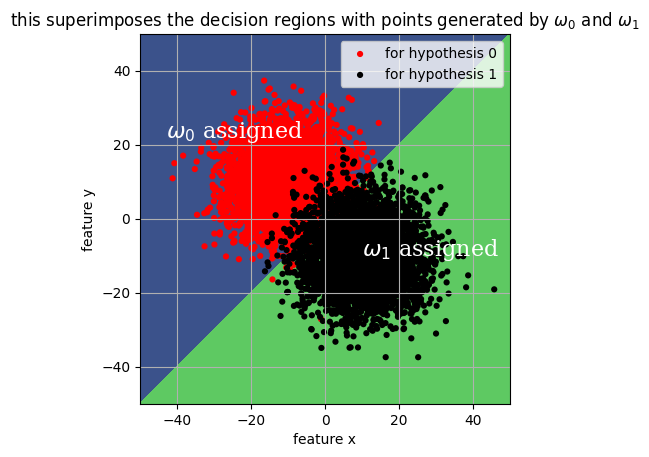

In [3]:
#Problem 1: Estimate the Probability of Error

import numpy as np
import matplotlib.pyplot as plt

N = 2                                # number of labels, in this case, 2 individual 2D Gaussian Distributions: one for w_0 and one for w_1


equi_probable = 1                    # if this equals 1, --> ML estimate with equal priors, so P(w_0)=P(w_1)=1/2
                                     # if this equals 0 --> the priors may be different
if equi_probable:
  prob = np.ones(N) *1/N             # if equi_probable=1, then all priors are uniform, P(w_i)=1/N
else:
  prob = np.random.uniform(0,1,N)    # if equi_probable=0, this generates a random prior for each label, but it must still be normalized
  prop=prob/np.sum(prob)             # this makes sure all priors add up to 1
  print('The random priors are [P(w_0)  P(w_1)]='+str(prop))


Mu_x = np.array([-10, 10])
Mu_y = np.array([ 10, -10])

# In this section, manually select all covariance matrices
Sigma = np.empty(N, dtype ='object') # Reserve N spaces for N Cov matricies
Sigma[0] = np.diag((60, 60))         # Create a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
Sigma[1] = np.diag((60, 60))       # Create a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix

#Define the graph area and  number of grid points
N_grid = 1000
X_boundary = 50.
Y_boundary = 50.
resolution = .1
x_min, x_max = -X_boundary, X_boundary
y_min, y_max = -Y_boundary, Y_boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))  # This creates a mesh or net of (x,y) values that go uniformly from boundary to boundary in 2D
h = 0*xx                                # This initializes the decision matrix for each (x,y) pair in the mesh to zero, and ensures it has the same dimensions as xx

# Simultaneously calculate the discriminant function for each (x,y) mesh point
# and compare them for i=0 and i=1
max = np.ones(xx.shape)* (-1e20)        # A very negative number for all (x,y) feature pairs in the mesh
for i in np.arange(N):
      discriminant = np.log(prob[i]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[i]))) \
      -(np.square(xx - Mu_x[i])/(2*Sigma[i][0,0]) + np.square(yy-Mu_y[i])/(2*Sigma[i][1,1])) # Discriminant function for test inequalities
      # display(discriminant.shape)
      h  = h* ((discriminant<max) *1.) + ((discriminant >= max) *1.) *(i+1)
      max = max * ((discriminant<max)*1.) + ((discriminant >= max)*1.) *discriminant

# Graph
plt.contourf(xx[0,:],yy[:,0],h[:, :])
LL = [i for i in range(N+1)]
cs = plt.contourf(xx[0,:], yy[:,0],h[:,:], LL)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
    for pc in cs.collections]
legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(N)]
plt.legend(proxy, legend_labels)
plt.xlabel('feature x')
plt.ylabel('feature y')
if N == 2:
  plt.title('this superimposes the decision regions with points generated by $\omega_0$ and $\omega_1$')
plt.grid()

color = 'r' + 'k'             # Concatenate the two strings for red (r) and black (k)
num_instances = 10000
MM = np.zeros(N, dtype= 'int32') # Create a vector to hold the number of insatnces for each hypothesis
error = np.zeros(N)           # For each label (hypothesis), initialize the error to zero and add to each one.
for i in np.arange(N):

  print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])
  MM[i] = int(np.round(prob[i]*num_instances))

  x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (MM[i]))
  y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (MM[i]))
  features= np.vstack((x,y))                                    # Stack all x's and y's into a matrix
  print("Number of instances for hypothesis ",i," is ",features.shape[1])

  # Evaluate the discriminants with the feature values and compare the two hypotheses
  discriminant_correct_class = np.log(prob[i]) -np.log(np.sqrt(np.linalg.det(Sigma[i]))) - \
                              ( 1/(2*Sigma[i][0,0]) *(np.square(x - Mu_x[i])) + 1/(2*Sigma[i][1,1]) * (np.square(y-Mu_y[i])) )
  m = (i+1)%N                    # For i=0, m=1 and for i=1, m=0

  discriminant_incorrect_class = np.log(prob[m]) -np.log(np.sqrt(np.linalg.det(Sigma[m]))) - \
                                 ( 1/(2*Sigma[m][0,0]) *(np.square(x - Mu_x[m]) + 1/(2*Sigma[m][1,1]) * np.square(y-Mu_y[m])) )

  error[i] = np.sum(discriminant_incorrect_class > discriminant_correct_class)/MM[i]   # For each hypothesis, add up all the times the "wrong" discriminant was bigger

#Scatter Plot
  plt.scatter(
    features[ 0, :],
    features[1 , :],
    s=20,
    linewidth=1,
    facecolors=color[i],
    edgecolors="none",
    label='for hypothesis '+str(i)
    )
  plt.legend()

font = {'family': 'serif',
       'color':  'white',
       'weight': 'normal',
       'size': 16,
       }
if N == 2:
  plt.text(-43, 22, r'$\omega_0$ assigned', fontdict=font)
  plt.text(10, -10, r'$\omega_1$ assigned', fontdict=font)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

total_error = error[0]*prob[0] + error[1]*prob[1]

print('measured error rate when w_0 is true = ', error[0])
print('measured error rate when w_1 is true = ', error[1])
print('total measured error rate = ', total_error)


Estimate the probability of error for the following cases

*   Change the mean $ \mu_0 =
  \begin{bmatrix} -15 \\0
  \end{bmatrix}
$  and $ \mu_1 =
  \begin{bmatrix} 15 \\0
  \end{bmatrix}
$
*   Change the $\Sigma_i$ to variances to $$
\Sigma_0 =  \begin{bmatrix}
    6^2 & 0  \\
    0 & 6^2
 \end{bmatrix}
$$
and

$$
 \Sigma_1 =  \begin{bmatrix}
    6.8^2 & 0  \\
    0 & 6.8^2
 \end{bmatrix}
$$


*   Change $P(\omega_0) = 0.85$ and $P(\omega_1) = 0.15$.




the prior for hypothesis  0 , P(w_ 0 ), is  0.85
Number of instances for hypothesis  0  is  8500
the prior for hypothesis  1 , P(w_ 1 ), is  0.15
Number of instances for hypothesis  1  is  1500
measured error rate when w_0 is true =  0.0032941176470588237
measured error rate when w_1 is true =  0.038
total measured error rate =  0.008499999999999999


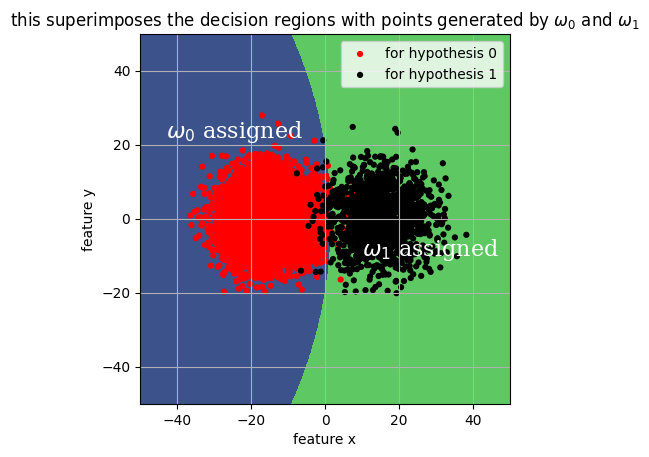

In [4]:
#Problem 2

# number of labels
N = 2

# Control
equi_probable = 0                    # if this equals 1 --> ML estimate with equal priors, so P(w_0)=P(w_1)=1/2
                                     # if this equals 0, --> priors may be different
if equi_probable:
  prob = np.ones(N) *1/N
else:
  prob = np.array([0.85, 0.15])

Mu_x = np.array([-15, 15])
Mu_y = np.array([ 0, 0])


# Manually selected covariance matrices
Sigma = np.empty(N, dtype ='object')
Sigma[0] = np.diag((6**2, 6**2))
Sigma[1] = np.diag((6.8**2, 6.8**2))

# Define graph area
N_grid = 1000
X_boundary = 50.
Y_boundary = 50.
resolution = .1
x_min, x_max = -X_boundary, X_boundary
y_min, y_max = -Y_boundary, Y_boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
h = 0*xx

max = np.ones(xx.shape)* (-1e20)        # set this to a very negative number for all (x,y) feature pairs in the mesh
for i in np.arange(N):
      discriminant = np.log(prob[i]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[i]))) \
      -(np.square(xx - Mu_x[i])/(2*Sigma[i][0,0]) + np.square(yy-Mu_y[i])/(2*Sigma[i][1,1]))
      # display(discriminant.shape)
      h  = h* ((discriminant<max) *1.) + ((discriminant >= max) *1.) *(i+1)

      max = max * ((discriminant<max)*1.) + ((discriminant >= max)*1.) *discriminant

#Graph
plt.contourf(xx[0,:],yy[:,0],h[:, :])
LL = [i for i in range(N+1)]
cs = plt.contourf(xx[0,:], yy[:,0],h[:,:], LL)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
    for pc in cs.collections]
legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(N)]
plt.legend(proxy, legend_labels)
plt.xlabel('feature x')
plt.ylabel('feature y')
if N == 2:
  plt.title('this superimposes the decision regions with points generated by $\omega_0$ and $\omega_1$')
plt.grid()

color = 'r' + 'k' # Concatenate
num_instances = 10000
MM = np.zeros(N, dtype= 'int32')
for i in np.arange(N):

  print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])
  MM[i] = int(np.round(prob[i]*num_instances))
  x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (MM[i]))
  y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (MM[i]))
  features= np.vstack((x,y))
  print("Number of instances for hypothesis ",i," is ",features.shape[1])
  # Evaluate the discriminants with the feature values and compare the two hypotheses
  discriminant_correct_class = np.log(prob[i]) -np.log(np.sqrt(np.linalg.det(Sigma[i]))) - \
                              ( 1/(2*Sigma[i][0,0]) *(np.square(x - Mu_x[i])) + 1/(2*Sigma[i][1,1]) * (np.square(y-Mu_y[i])) )
  m = (i+1)%N                    # For i=0, m=1 and for i=1, m=0

  discriminant_incorrect_class = np.log(prob[m]) -np.log(np.sqrt(np.linalg.det(Sigma[m]))) - \
                                 ( 1/(2*Sigma[m][0,0]) *(np.square(x - Mu_x[m]) + 1/(2*Sigma[m][1,1]) * np.square(y-Mu_y[m])) )

  error[i] = np.sum(discriminant_incorrect_class > discriminant_correct_class)/MM[i]

# Scatter Plot
  plt.scatter(
    features[ 0, :],
    features[1 , :],
    s=20,
    linewidth=1,
    facecolors=color[i],
    edgecolors="none",
    label='for hypothesis '+str(i)
    )
  plt.legend()

font = {'family': 'serif',
       'color':  'white',
       'weight': 'normal',
       'size': 16,
       }
if N == 2:
  plt.text(-43, 22, r'$\omega_0$ assigned', fontdict=font)
  plt.text(10, -10, r'$\omega_1$ assigned', fontdict=font)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

total_error = error[0]*prob[0] + error[1]*prob[1]

print('measured error rate when w_0 is true = ', error[0])
print('measured error rate when w_1 is true = ', error[1])
print('total measured error rate = ', total_error)
